In [12]:
import glob
import DataViz as dv
from random import shuffle
import matplotlib
import matplotlib.image as mpimg
import imageio as im
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import keras
from keras.datasets import cifar10
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
import LoadDataset as LD
import numpy as np
import scipy.misc
from scipy.misc import imresize
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import matplotlib.pyplot as plt

In [6]:
# Hyperparameters
batch_size = 128
num_classes = 2
epochs = 6
print(epochs)

6


In [4]:
n_categories = 2
categories = np.array(['c0', 'c1'])

load_data = LD.LoadData('/Volumes/Data/Project/imgs/train/') # give the directory address.
X_dat ,Y_dat = load_data.generate_data_2cls(['c0', 'c1'])

X_dat, Y_dat = load_data.shuffle_data(X_dat,Y_dat)

Dataset directory added
['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
c0  directory images are fetched!!! 
c1  directory images are fetched!!! 


In [5]:
X = np.array(X_dat)
Y = np.array(Y_dat)
X.shape

(4756, 227, 227, 3)

In [7]:
np.save('X',X)
np.save('Y',Y)

In [8]:
import Sampler as sp

X = np.load('X.npy')
Y = np.load('Y.npy')

In [9]:
#geting sample example
import Sampler as sp
newdataX,newdataY = sp.getSampleEachClass(X, Y,2,2)
newdataX.shape
print(np.shape(newdataX))
print(len(newdataY))
print(newdataY)

(4, 227, 227, 3)
4
[1 1 0 0]


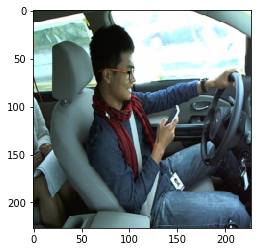

(227, 227, 3)


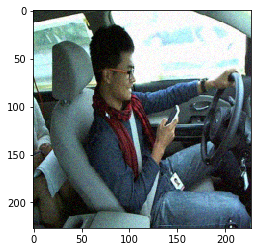

In [13]:
#example of gaussian noise
import Noise as noise
noisey_label = noise.AddNoise()
# Testing of gaussian noise
X_gaus_img = noisey_label.add_noise(newdataX)

X_gaus_img[0,:,:,:].shape
plt.imshow(newdataX[0,:,:,:])
plt.show()
X_gaus_img = np.clip(X_gaus_img[0,:,:,:], 0, 255).astype('uint8')

print(X_gaus_img.shape)
plt.imshow(X_gaus_img)

plt.show()

In [14]:
#Adding noise in label example
import Noise as noise
noisey_label = noise.AddNoise()
ymm  = noisey_label.random_output_label(np.arange(1,100),10)
print(len(np.arange(1,100)))
print(len(ymm))

<class 'int'> <class 'int'>
99
99


In [15]:
(x_train, y_train) = (X[0:15000], Y[0:15000])
(x_test, y_test) = (X[15000:], Y[15000:])
img_height, img_width, channel = x_train.shape[1],x_train.shape[2],x_train.shape[3]
print(img_height, img_width, channel)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(x_train.shape)

227 227 3
(4756, 227, 227, 3)


In [16]:
#model for sub task 

def AlexNetVarient(input_shp, conv_layer = 5, number_kernal = 96, dence_layer = 3, number_neuron =100):
    model = Sequential() 
    #initial layer fixed
    model.add(Conv2D(96, (11,11), strides=(4,4),activation='relu', padding='same', input_shape=input_shp))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(BatchNormalization())
    for i in range(conv_layer-1):
        model.add(Conv2D(number_kernal, (3,3), activation='relu', padding='same'))
        #model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
        # Local Response normalization for Original Alexnet
        model.add(BatchNormalization())
    model.add(Flatten())
    for l in range(dence_layer):
        model.add(Dense(100, activation='relu'))
        model.add(Dropout(0.2))
        
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

In [17]:
m = AlexNetVarient((img_height, img_width, channel,))

In [19]:
# AlexNet Define the Model
model_parmeters ={'number_kernel_conv_1':96,
                  'number_kernel_conv_2': 100, 
                  'number_kernel_conv_3':100,
                 'number_kernel_conv_4':100,
                 'number_kernel_conv_5':100,
                  'number_kernel_conv_6':100,
                 'number_kernel_conv_7':100,
                 'param_in_1_fully_connected':10000,
                 'param_in_2_fully_connected':10000,
                 'param_in_3_fully_connected':10000,
                 'param_in_4_fully_connected':10000,
                 'param_in_5_fully_connected':10000,
                 'dropout_1_f_layer':0.2,
                 'dropout_1_f_layer':0.4,
                 'dropout_1_f_layer':0.3,
                 'dropout_1_f_layer':0.3}
model = Sequential()
# model.add(Conv2D(10, (11,11), strides=(4,4), activation='relu', padding='valid', input_shape=(img_height, img_width, channel,)))
# for original Alexnet
model.add(Conv2D(3, (11,11), strides=(4,4), padding='same', input_shape=(img_height, img_width, channel,)))
convout1 = Activation('relu')
model.add(convout1)
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
# Local Response normalization for Original Alexnet
model.add(BatchNormalization())

#model.add(Conv2D(2, (5,5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
# Local Response normalization for Original Alexnet
model.add(BatchNormalization())

#model.add(Conv2D(3, (3,3), activation='relu', padding='same'))
#model.add(Conv2D(3, (3,3), activation='relu', padding='same'))
model.add(Conv2D(3, (3,3), activation='relu', padding='same'))
#model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
# Local Response normalization for Original Alexnet
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(4096, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [20]:
# print the model summary
model.summary()

# determine Loss function and Optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# Train the Model
#Preprocessing of images 

checkpointer = ModelCheckpoint(filepath="best_weights.hdf5",
                               monitor='val_acc',
                               verbose=1,
                               save_best_only= True)



history = model.fit(x_train, y_train,
                              batch_size = batch_size,
                              epochs=epochs,
                              callbacks=[checkpointer],
                              verbose=1,
                              validation_data=(x_test, y_test))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 57, 57, 3)         1092      
_________________________________________________________________
activation_1 (Activation)    (None, 57, 57, 3)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 3)         0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 3)         12        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 3)         0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 13, 13, 3)         12        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 3)         84        
__________

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/callbacks.py:434: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


4756/4756 [==============================] - 56s 12ms/step - loss: 0.1114 - acc: 0.9674
Epoch 3/6
4756/4756 [==============================] - 54s 11ms/step - loss: 0.0512 - acc: 0.9855
Epoch 4/6
4756/4756 [==============================] - 53s 11ms/step - loss: 0.0257 - acc: 0.9939
Epoch 5/6
4756/4756 [==============================] - 56s 12ms/step - loss: 0.0170 - acc: 0.9964
Epoch 6/6
4756/4756 [==============================] - 59s 12ms/step - loss: 0.0127 - acc: 0.9971


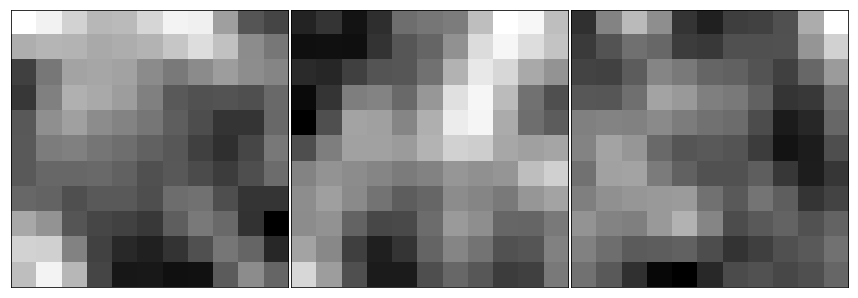

In [21]:
#Example of data vizaulization 
import DataViz as dv
keranl_vix =  dv.DataVizulaize(model)
#for layer in model.layers:
#   weights = layer.get_weights() # list of numpy arrays
vizul = keranl_vix.vizualize(0,3, shapeofgrid = (1,3),gray=True)

In [22]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

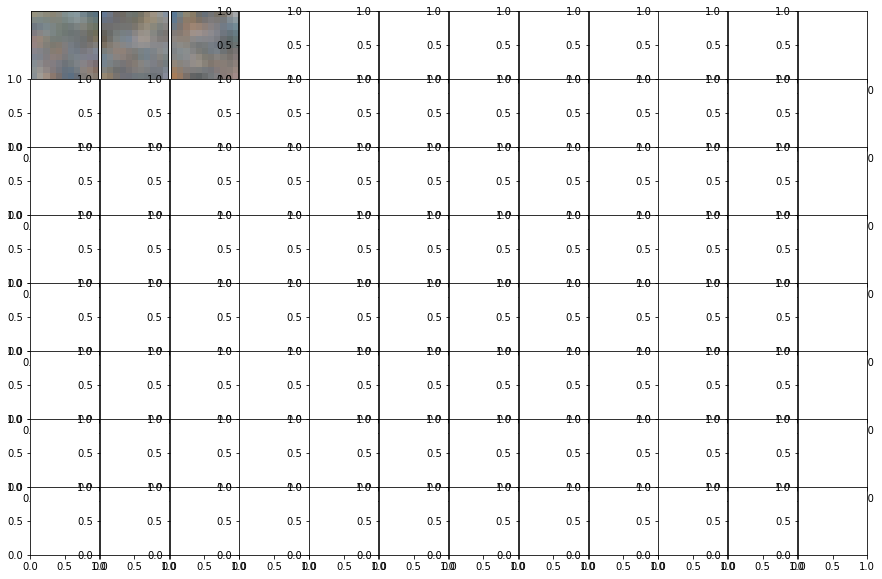

In [23]:
# kernal vizulization example
kernals = model.layers[0].get_weights()[0]
from scipy.ndimage.filters import gaussian_filter
fig, axs = plt.subplots(8,12, figsize=(15,10))
fig.subplots_adjust(hspace = .01, wspace=.01)
axs = axs.ravel()

for i in range(np.shape(kernals)[3]):
    one_kernal = np.abs(kernals[:,:,:,i])
    one_kernal -= one_kernal.mean() # Post-processes the feature to make it visually palatable
    one_kernal /= one_kernal.std()
    one_kernal *= 64
    one_kernal += 128
    one_kernal= np.clip(one_kernal, 0, 255).astype('uint8')
    #one_kernal =rgb2gray(one_kernal)
    one_kernal = gaussian_filter(one_kernal, 1)
    axs[i].imshow(one_kernal,cmap='gray')
    axs[i].axes.get_xaxis().set_ticks([])
    axs[i].axes.get_yaxis().set_ticks([])
    #axs[i].set_title(str(250+i))



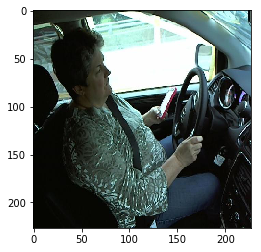

In [24]:
#Specifing an image t see the output of different layer 



img_path = '/Volumes/Data/Project/imgs/test/img_7.jpg'
img = image.load_img(img_path,target_size=(227,227))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor,axis=0)
img_tensor /=255.

plt.imshow(img_tensor[0])
plt.show()
#print(img_tensor)

In [25]:
#predicting image
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
images = np.vstack([x])
classes = model.predict_classes(images,batch_size=1)
print("predicted claas is : ", classes)

predicted claas is :  [0]


In [26]:
layer_outputs = [layer.output for layer in model.layers[0:2]]
#extracting last 8 layer

activation_model = models.Model(inputs=model.input,outputs=layer_outputs)
#creates a model that will return these outputs, given the model input

In [27]:
activations = activation_model.predict(img_tensor)
#return a list of five Numpyarry: one array per layer activation
len(activations)

2

In [28]:
#first layer activation 
first_layer_activation = activations[0]
print(first_layer_activation.shape)


(1, 57, 57, 3)


In [29]:
plt.matshow(first_layer_activation[0,:,:,4])

IndexError: index 4 is out of bounds for axis 3 with size 3

In [30]:
layer_names = []
classifier  = model
for layer in classifier.layers[0:5]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/image.py:865: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.5, top=-0.5
  self.axes.set_ylim((ymin, ymax), auto=None)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axis.py:1081: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axis.py:1091: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "


RuntimeError: libpng signaled error

<Figure size 1152x0 with 1 Axes>

RuntimeError: libpng signaled error

<Figure size 1152x0 with 1 Axes>

dict_keys(['loss', 'acc'])


KeyError: 'val_acc'

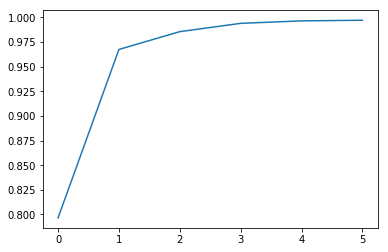

In [31]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
# Test the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

IndexError: list index out of range